## 제주 빅데이터 경진대회

## import.위드

## 2020년 7월 3일 (제출날짜)

1. 본 코드는 대회 참가를 돕고자 단순 예시를 작성한 것으로 참고용으로 사용바랍니다.
2. 본 코드는 자유롭게 수정하여 사용 할 수 있습니다.

- base code : https://dacon.io/competitions/official/235615/codeshare/1228?page=1&dtype=recent&ptype=pub

## 1. 라이브러리 가져오기
## Import Library

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')
# 주피터 노트북을 사용하는 경우에는 다음처럼 매직(magic) 명령으로 노트북 내부에 그림을 표시하도록 지정해야 한다.
%matplotlib.inline

pd.options.display.max_rows = None 
pd.options.display.max_columns = None 
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')
%matplotlib inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
!python --version

Pandas : 0.25.1
Numpy : 1.16.5
Scikit-Learn : 0.21.3


Python 3.6.9 :: Anaconda, Inc.


## 2. 데이터 전처리
## Data Cleansing & Pre-Processing  

In [4]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [5]:
# 날짜 처리
data = pd.read_csv('data/201901-202003.csv')
data = data.fillna('')
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)

In [6]:
# 데이터 정제
df = data.copy()
df = df.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1)

columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']
df = df.groupby(columns).sum().reset_index(drop=False)

In [7]:
# 인코딩
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

## 3. 탐색적 자료분석
## Exploratory Data Analysis

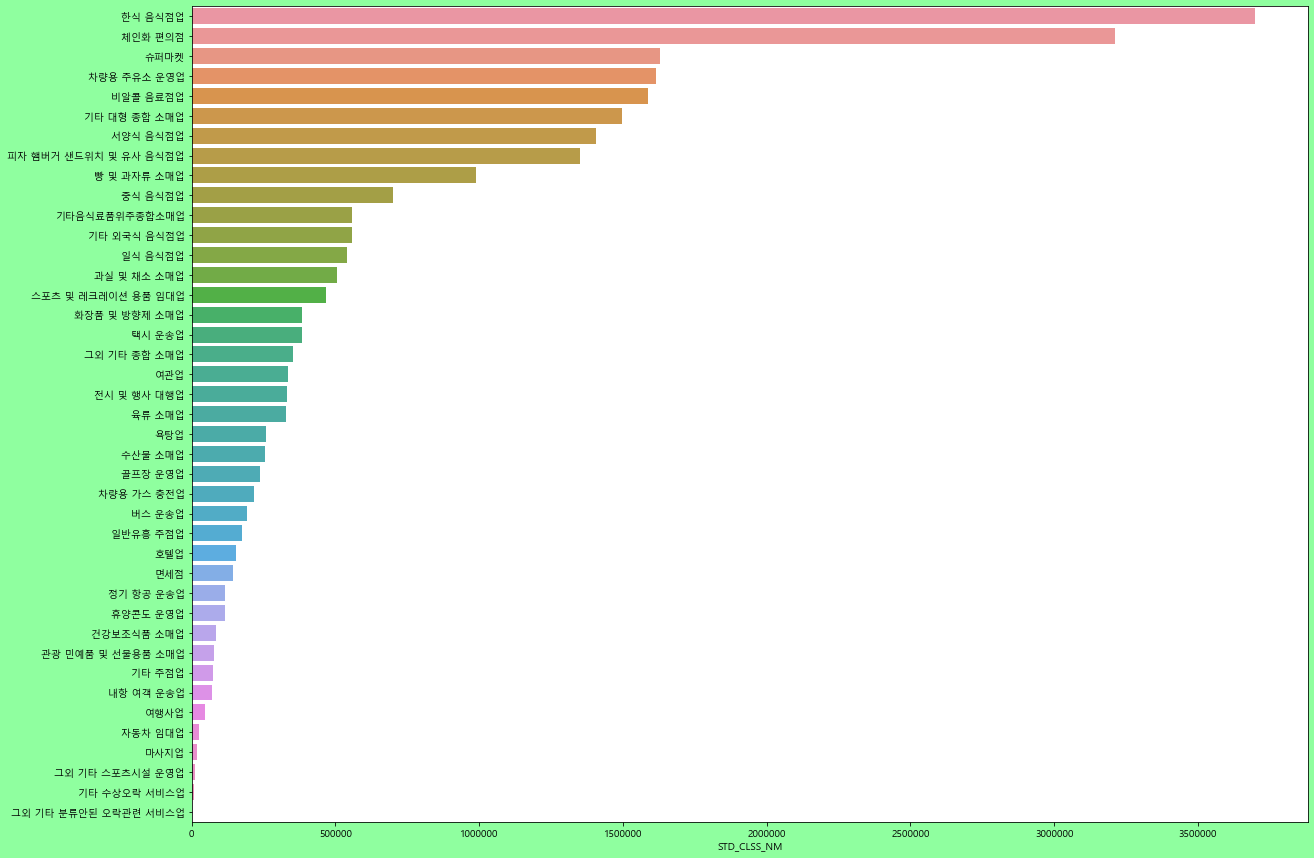

In [8]:
# 업종별 등장 빈도수
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y=data['STD_CLSS_NM'].value_counts().index,x=data['STD_CLSS_NM'].value_counts())
#plt.tight_layout()
# 입력하세요.

In [9]:
city_count= data.groupby(['CARD_SIDO_NM','CARD_CCG_NM'])['STD_CLSS_NM'].value_counts().reset_index(name='count')
city_count.head()

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,count
0,강원,강릉시,한식 음식점업,24490
1,강원,강릉시,체인화 편의점,20117
2,강원,강릉시,비알콜 음료점업,13013
3,강원,강릉시,서양식 음식점업,12398
4,강원,강릉시,기타 대형 종합 소매업,10258


In [10]:
# 사실상 시,군,구 변수는 활용을 할 수 없기때문에 도별로 접근하는 것이 좋을 것으로 보인다.
city_sum = city_count.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['count'].sum().reset_index(name='sum')
city_sum.head()

,CARD_SIDO_NM,STD_CLSS_NM,sum
0,강원,건강보조식품 소매업,1480
1,강원,골프장 운영업,32089
2,강원,과실 및 채소 소매업,27154
3,강원,관광 민예품 및 선물용품 소매업,4428
4,강원,그외 기타 분류안된 오락관련 서비스업,2


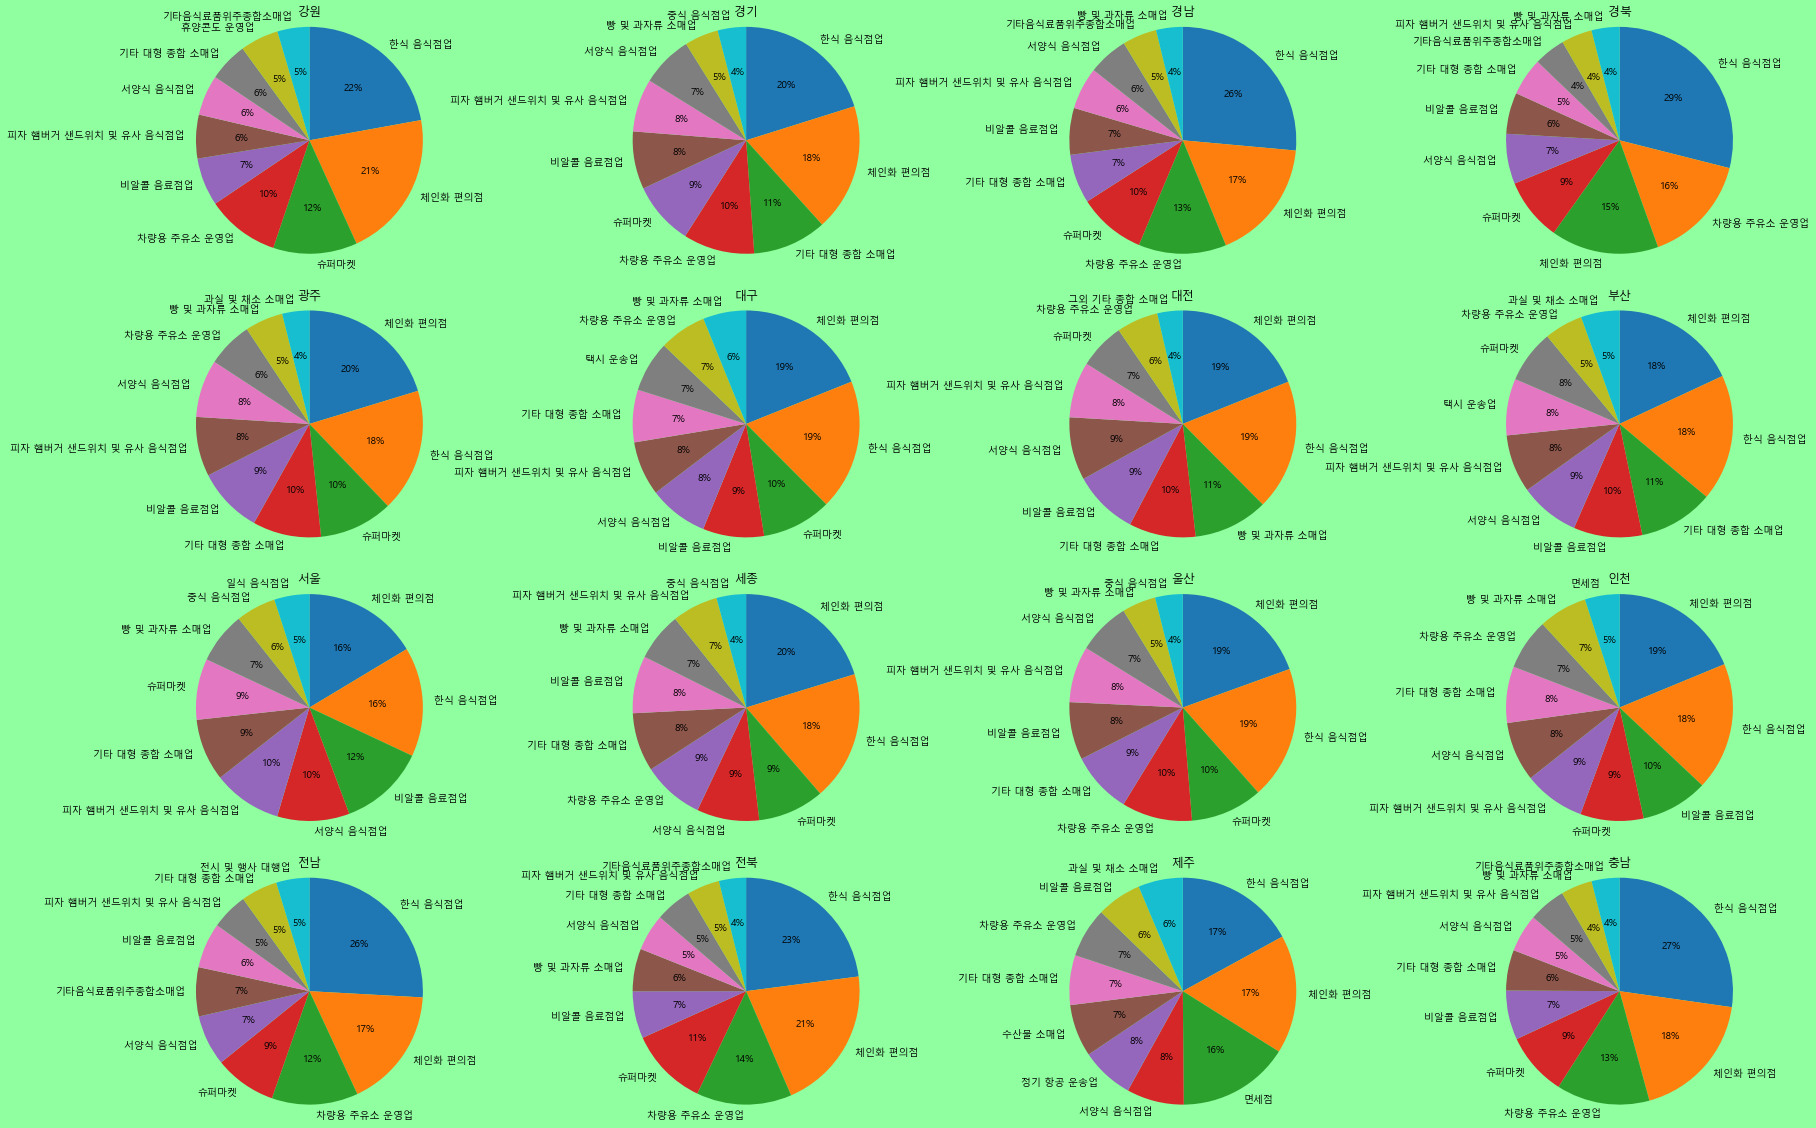

In [11]:
# 도, 특별시, 광역시에 따른 업종별 소비 등장 횟수

fig,axs = plt.subplots(4, 4)
fig.set_size_inches(30,20)
fig.patch.set_facecolor('xkcd:mint green')

for idx,city in enumerate(city_sum['CARD_SIDO_NM'].unique()):
  if idx <=3:
    axs[0, idx].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[0, idx].title.set_text(city)
  if idx > 3 and idx <=7:
    axs[1, idx-4].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[1, idx-4].title.set_text(city)
  if idx > 7 and idx <= 11:
    axs[2, idx-8].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[2, idx-8].title.set_text(city)
  if idx > 11 and idx <=15:
    axs[3, idx-12].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['sum'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('sum',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[3, idx-12].title.set_text(city)

#plt.tight_layout()
plt.show()

In [12]:
stuff = data.groupby('STD_CLSS_NM')[['CNT','CSTMR_CNT']].sum().reset_index()
stuff.head()

,STD_CLSS_NM,CNT,CSTMR_CNT
0,건강보조식품 소매업,1097627,921682
1,골프장 운영업,4951383,3649887
2,과실 및 채소 소매업,24497628,15953201
3,관광 민예품 및 선물용품 소매업,593750,482667
4,그외 기타 분류안된 오락관련 서비스업,1410,1258


In [13]:
def make_bar(data,x_col,y_col):
  fig = plt.figure(figsize=(14, 7))
  fig.patch.set_facecolor('xkcd:mint green')
  sns.barplot(x=x_col,y=y_col,data=data.sort_values(x_col,ascending=False))
  plt.title(x_col)
  plt.show()

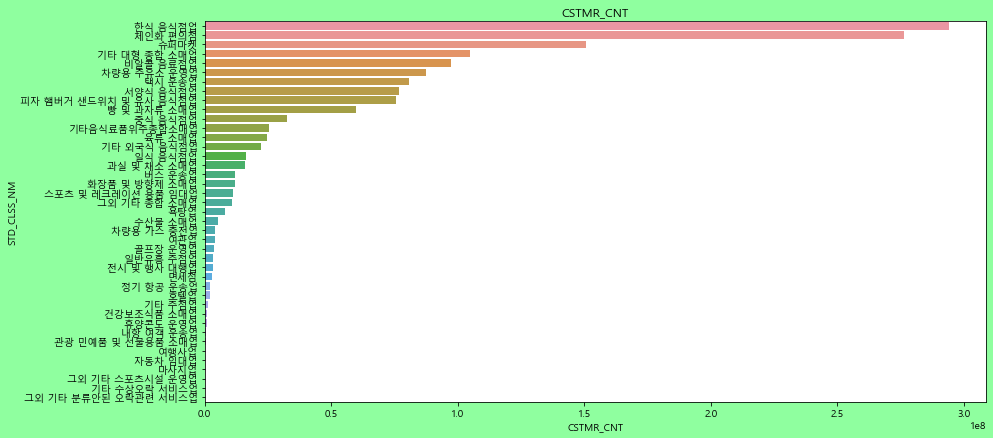

In [14]:
# 이용고객수
make_bar(stuff,'CSTMR_CNT','STD_CLSS_NM')

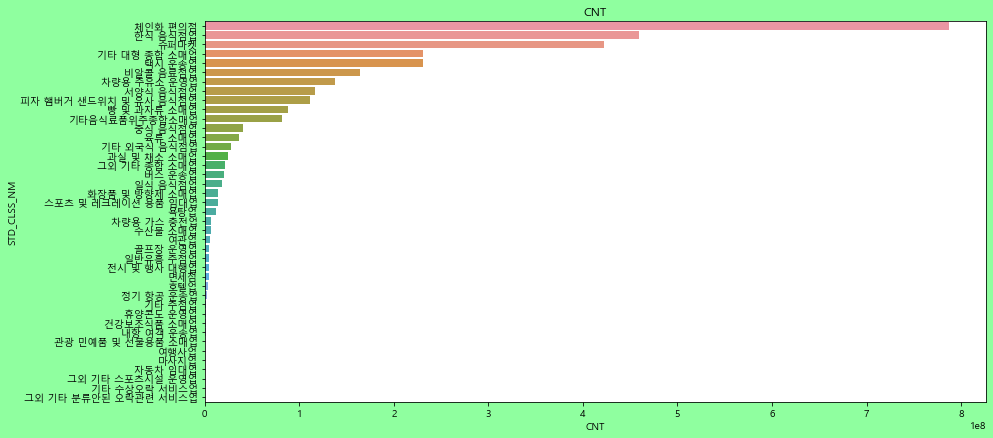

In [15]:
# 이용 횟수
make_bar(stuff,'CNT','STD_CLSS_NM')

In [16]:
data['gap']= data['CNT'] - data['CSTMR_CNT']

In [17]:
data[data['gap'] == -236]

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month,gap
22840723,서울,강서구,정기 항공 운송업,제주,제주시,40s,2,3,643,9643960,407,2020,2,-236


In [18]:
data.loc[data['gap'] <0,'mark'] = '취소있음'
data.loc[data['gap'] ==0,'mark'] = '고객다름'
data.loc[data['gap'] >0,'mark'] = '단골있음'

In [19]:
gap=data.groupby('STD_CLSS_NM')['mark'].value_counts().reset_index(name='count')
gap.head()

,STD_CLSS_NM,mark,count
0,건강보조식품 소매업,단골있음,43803
1,건강보조식품 소매업,고객다름,37272
2,건강보조식품 소매업,취소있음,2782
3,골프장 운영업,단골있음,164503
4,골프장 운영업,고객다름,71807


In [20]:
# 카드 취소 내역이 있는 업종

df=gap.groupby('STD_CLSS_NM')['count'].sum().reset_index().merge(gap[gap['mark']=='취소있음'][['STD_CLSS_NM','count']],on='STD_CLSS_NM')
df.rename(columns={'count_x': 'total',
                   'count_y': 'cancel_count'},inplace=True)
df['rate'] = df['cancel_count']/df['total']

df=df.sort_values('rate',ascending=False,ignore_index=True)
df.head()

TypeError: sort_values() got an unexpected keyword argument 'ignore_index'

In [ ]:
# 새로운 고객으로만 구성된 업종

df=gap.groupby('STD_CLSS_NM')['count'].sum().reset_index().merge(gap[gap['mark']=='고객다름'][['STD_CLSS_NM','count']],on='STD_CLSS_NM')
df.rename(columns={'count_x': 'total',
                   'count_y': 'differ_count'},inplace=True)
df['rate'] = df['differ_count']/df['total']

df=df.sort_values('rate',ascending=False,ignore_index=True)
df.head()

In [ ]:
# 단골 고객이 있는 업종

df=gap.groupby('STD_CLSS_NM')['count'].sum().reset_index().merge(gap[gap['mark']=='단골있음'][['STD_CLSS_NM','count']],on='STD_CLSS_NM')
df.rename(columns={'count_x': 'total',
                   'count_y': 'differ_count'},inplace=True)
df['rate'] = df['differ_count']/df['total']

df=df.sort_values('rate',ascending=False,ignore_index=True)
df.head(20)

In [ ]:
data.drop(['gap','mark'],axis=1,inplace=True) # 데이터 원상복구

In [ ]:
data.head()

In [ ]:
df = data.groupby('CARD_SIDO_NM')[['CSTMR_CNT','CNT']].sum().reset_index()

In [ ]:
df.head()

In [ ]:
df['CSTMR_CNT']/df['CNT']

In [ ]:
df = data.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])[['CSTMR_CNT','CNT']].sum().reset_index()
df.head()

In [ ]:
df[df['CSTMR_CNT']>df['CNT']]

In [ ]:
# 재방문율 변수 만들기

df['re_visit']=1 - df['CSTMR_CNT']/df['CNT']

In [ ]:
df[df['CARD_SIDO_NM'] == '강원'].sort_values('re_visit',ascending=False).head()

'''예상대로 편의점이 재방문율이 높게 나옴'''

In [ ]:
fig,axs = plt.subplots(4, 4)
fig.set_size_inches(30,20)
fig.patch.set_facecolor('xkcd:mint green')

for idx,city in enumerate(df['CARD_SIDO_NM'].unique()):
  if idx <=3:
    axs[0, idx].pie(df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['re_visit'],autopct='%.0f%%',
                  labels= df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[0, idx].title.set_text(city)
  if idx > 3 and idx <=7:
    axs[1, idx-4].pie(df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['re_visit'],autopct='%.0f%%',
                  labels= df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[1, idx-4].title.set_text(city)
  if idx > 7 and idx <= 11:
    axs[2, idx-8].pie(df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['re_visit'],autopct='%.0f%%',
                  labels= df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[2, idx-8].title.set_text(city)
  if idx > 11 and idx <=15:
    axs[3, idx-12].pie(df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['re_visit'],autopct='%.0f%%',
                  labels= df[df['CARD_SIDO_NM']==city].sort_values('re_visit',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
    axs[3, idx-12].title.set_text(city)

#plt.tight_layout()
plt.show()

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

In [ ]:
# feature, target 설정
train_num = df_num.sample(frac=1, random_state=0)
x = train_num.drop(['CSTMR_CNT', 'AMT', 'CNT'], axis=1)
y = np.log1p(train_num['AMT'])

In [ ]:
k = int(len(x)*0.9)

In [ ]:
x_train = x[:k]
y_train = y[:k]
x_val = x[k:]
y_val = y[k:]

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

In [ ]:
import lightgbm as lgb

In [ ]:
train_ds = lgb.Dataset(x_train, label=y_train)
val_ds = lgb.Dataset(x_val, label=y_val)

In [ ]:
params = {
            'learning_rate' : 0.05,
            'boosting_type': 'gbdt',
            'objective': 'tweedie',
            'tweedie_variance_power': 1.1,
            'metric': 'rmse',
            'sub_row' : 0.75,
            'lambda_l2' : 0.1
        }

In [ ]:
model = lgb.train(params,
                  train_ds,
                  1000,
                  val_ds,
                  verbose_eval = 100,
                  early_stopping_rounds = 100
                 )

## 6. 결과 및 결언
## Conclusion & Discussion

In [ ]:
# 예측 템플릿 만들기
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4, 7]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=x.columns)

In [ ]:
# 예측
pred = model.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [ ]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

In [ ]:
# 제출 파일 만들기
submission = pd.read_csv('data/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('submission.csv', encoding='utf-8-sig')
submission.head()